In [1]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline
print('Finish Import')

Finish Import


In [57]:
df = pd.read_csv('./dataSet/lights-on/0.txt', index_col=0)
tmp = np.array(df)
print(tmp, tmp.shape)

[[-1.49 -2.95 -0.02 -6.58]
 [-4.96 -4.68 -5.86 -5.47]
 [-4.91 -3.57 -6.6  -1.15]
 ...
 [ 1.35 -3.36  1.18  3.63]
 [ 3.4   2.27  1.22  9.03]
 [ 3.61  4.01  2.4   6.29]] (400, 4)


dataSet/lights-on/16.txt


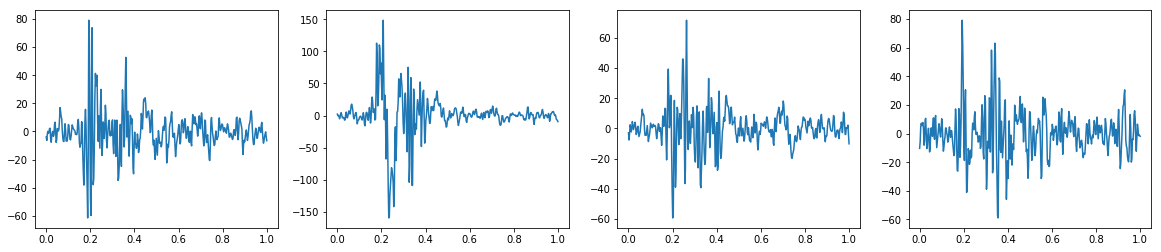

dataSet/lights-on/339.txt


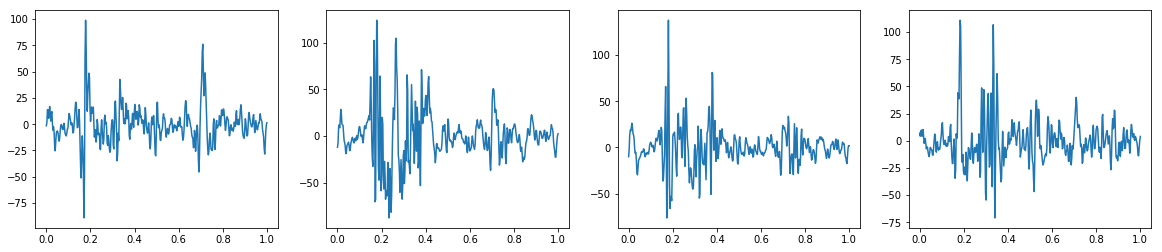

dataSet/lights-on/193.txt


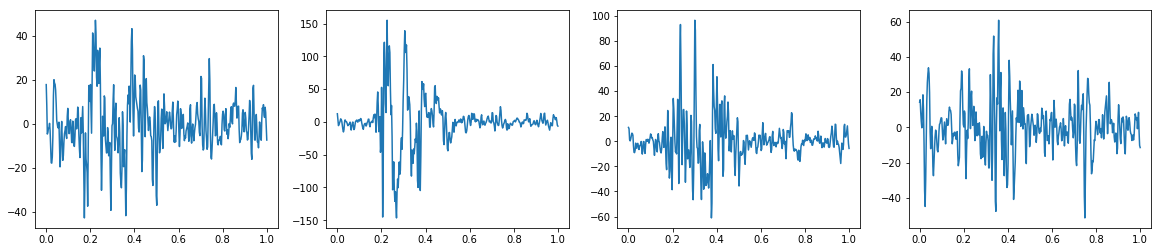

dataSet/lights-on/11.txt


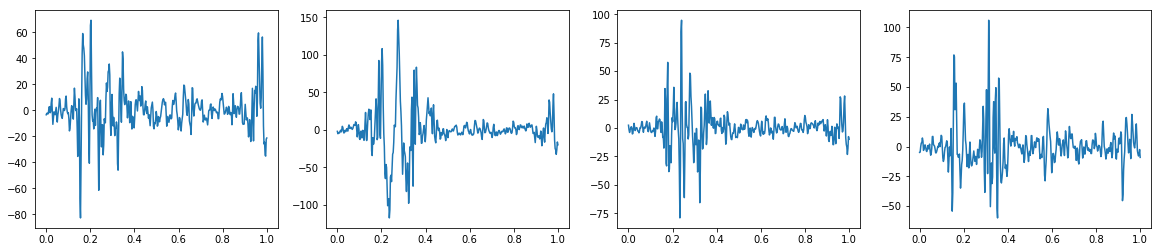

dataSet/lights-on/115.txt


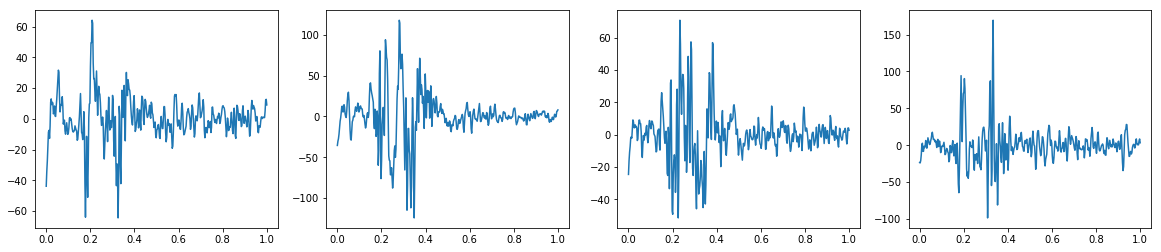

dataSet/lights-on/135.txt


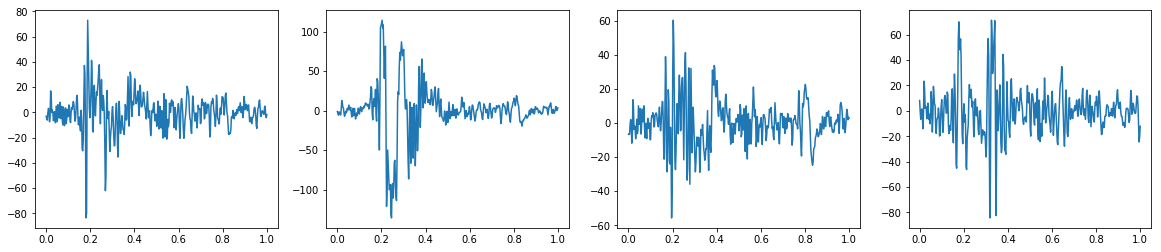

dataSet/lights-on/77.txt


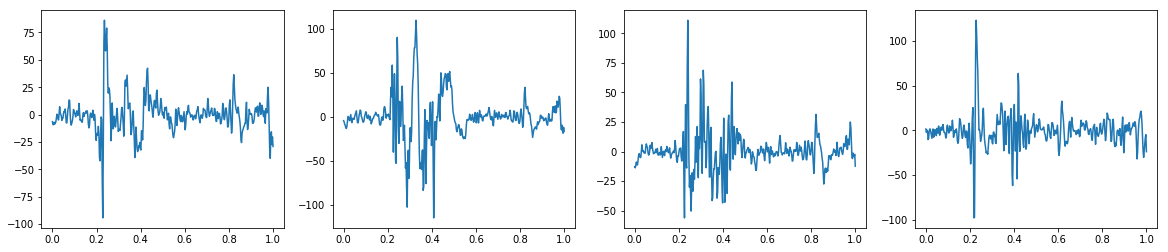

dataSet/lights-on/345.txt


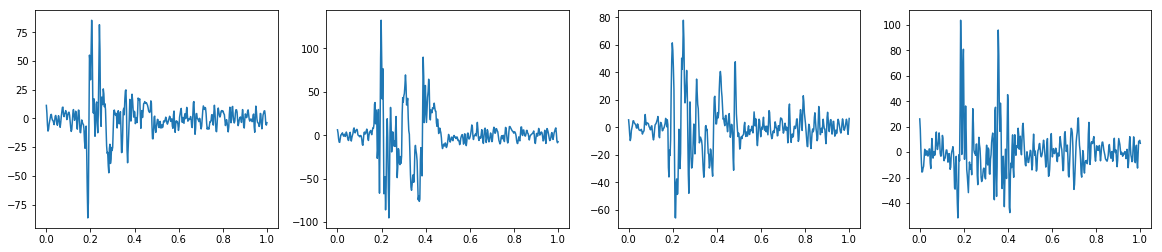

dataSet/lights-on/226.txt


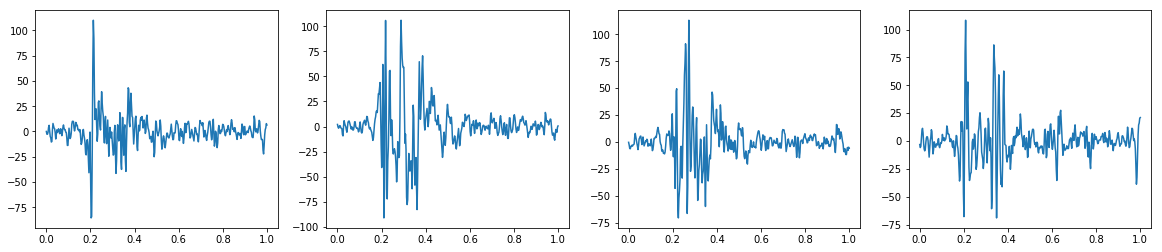

dataSet/lights-on/411.txt


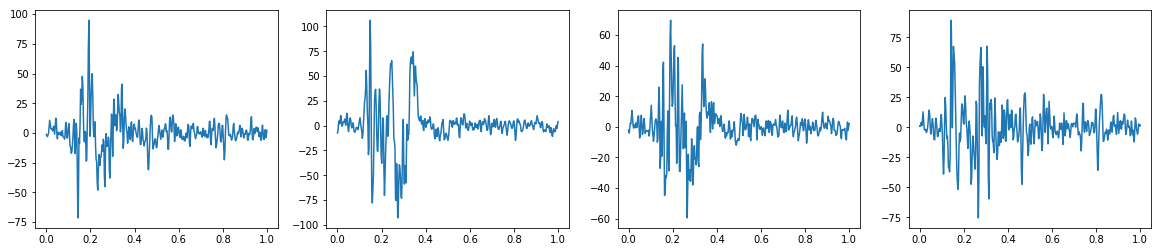

dataSet/lights-on/223.txt


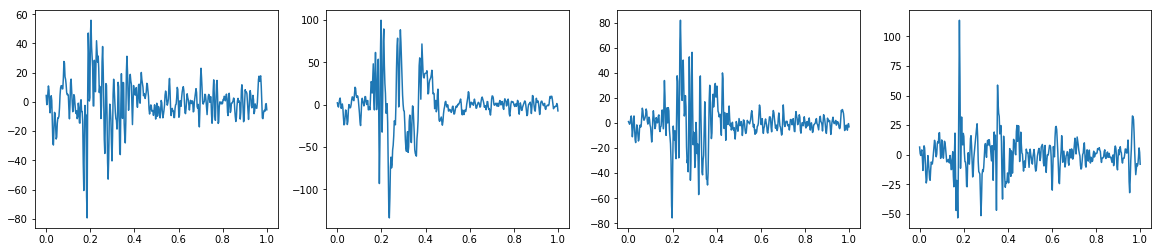

dataSet/lights-on/327.txt


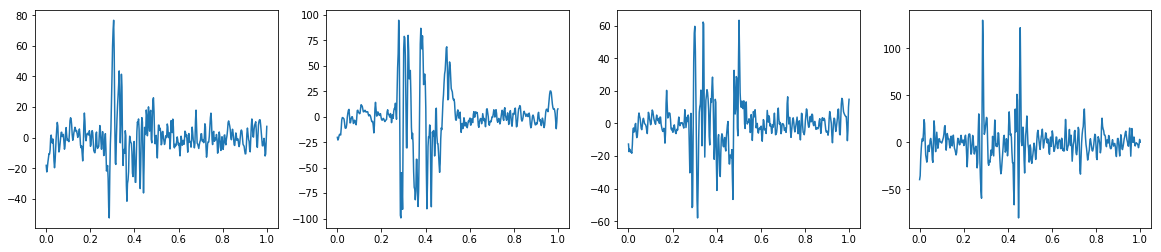

dataSet/lights-on/437.txt


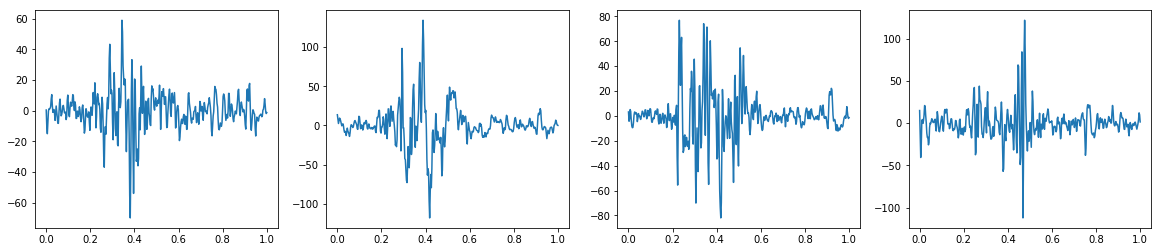

dataSet/lights-on/475.txt


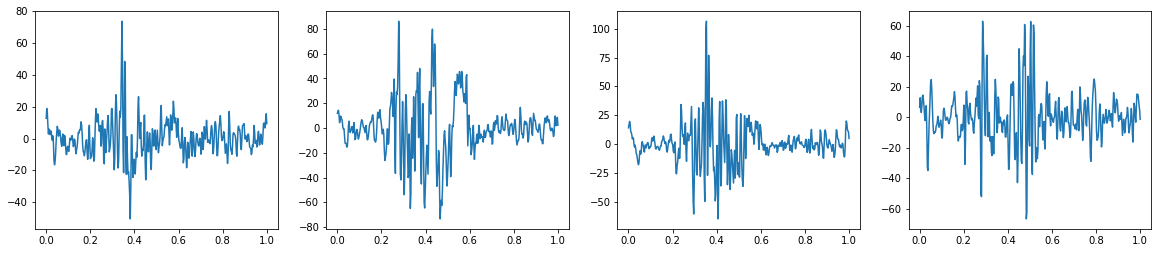

dataSet/lights-on/104.txt


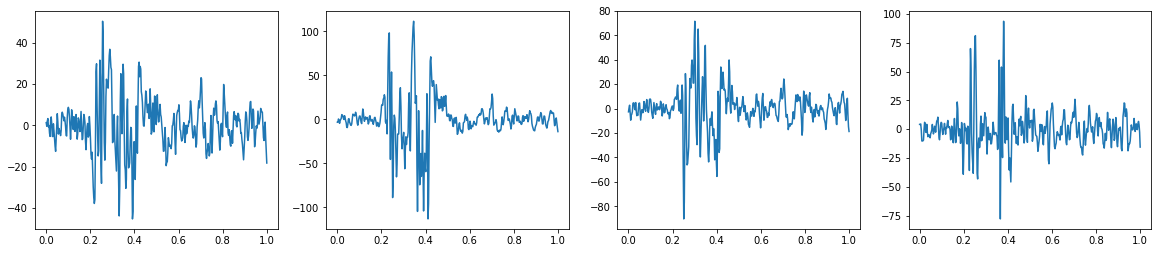

dataSet/lights-on/463.txt


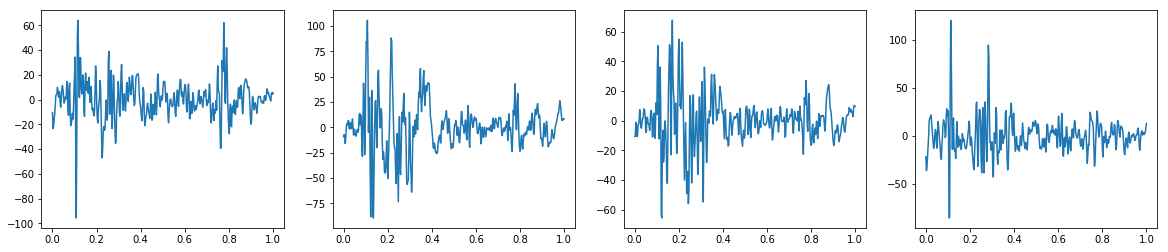

dataSet/lights-on/127.txt


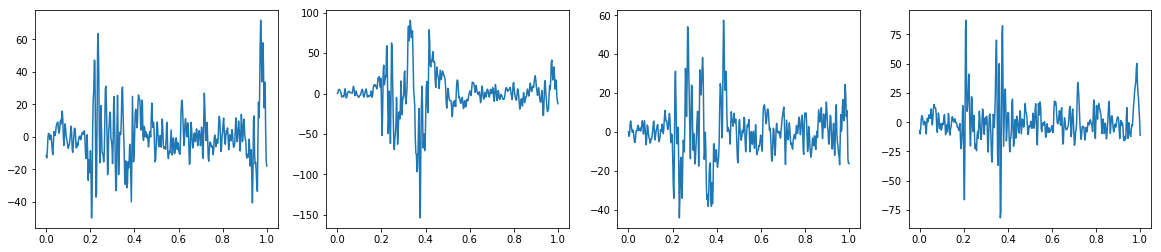

dataSet/lights-on/263.txt


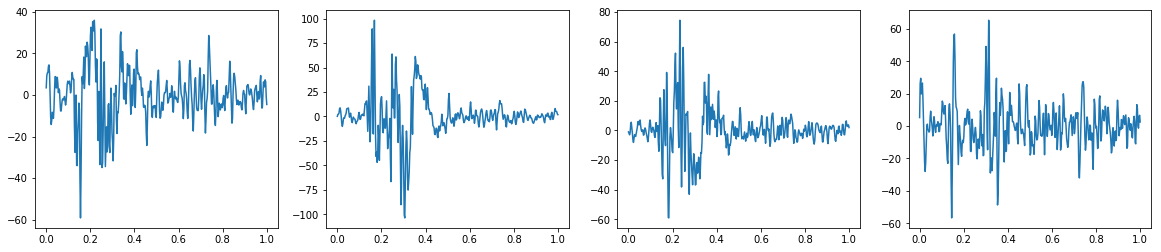

dataSet/lights-on/376.txt


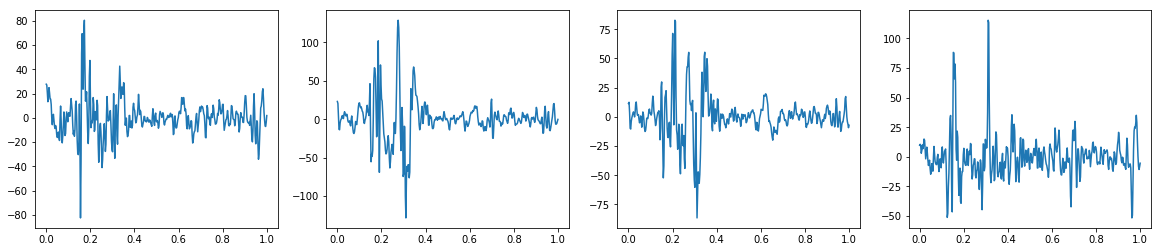

dataSet/lights-on/216.txt


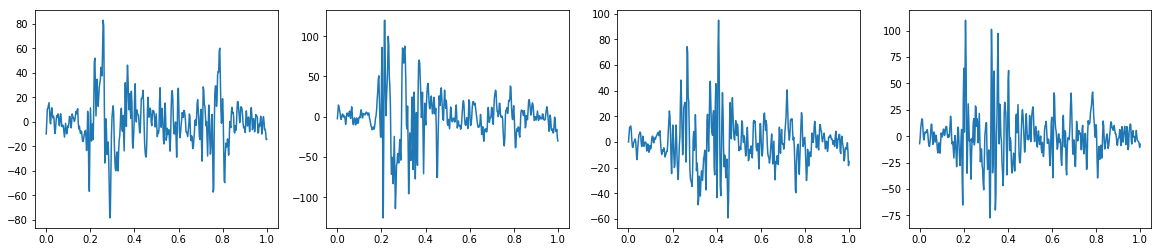

In [54]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
#     print(nperseg, noverlap)
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

def print_graph(path):
    files = [(str(file), file.parts[-2]) for file in Path(path).glob("**/*.txt") if file]
    channels = ['ch1', 'ch2', 'ch3', 'ch4']
    sample_rate = 400
    
    for file in files[:20]:
        print(file[0])
        df = pd.read_csv(file[0], index_col=0)
        subplot = 1
        fig = plt.figure(figsize=(20, 4))
        
        for ch in channels:
            _, _, spectrogram = log_specgram(df[ch], sample_rate)
            ax1 = fig.add_subplot(1, 4, subplot)
            img = ax1.plot(np.linspace(0, sample_rate/len(df[ch]), len(df[ch])), df[ch])
#             plt.imshow(img)
            subplot = subplot + 1
        plt.show()
        del df

print_graph('./dataSet/lights-on/')

dataSet/turn-off/16.txt


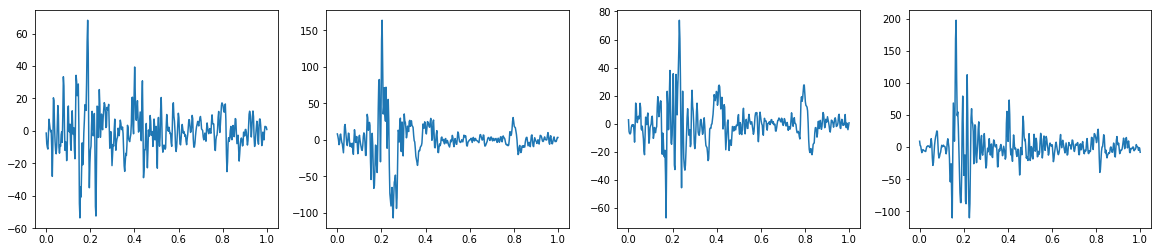

dataSet/turn-off/339.txt


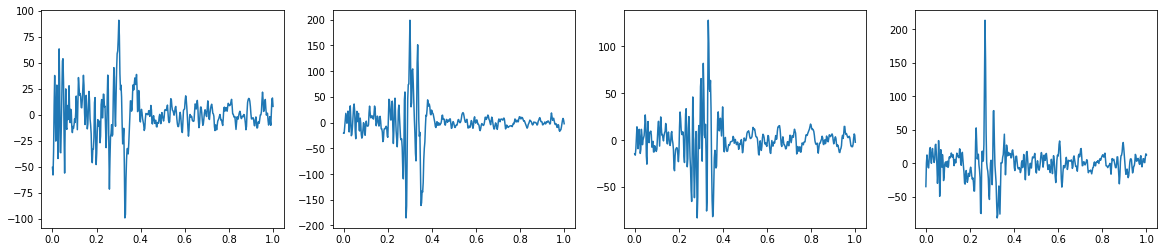

dataSet/turn-off/193.txt


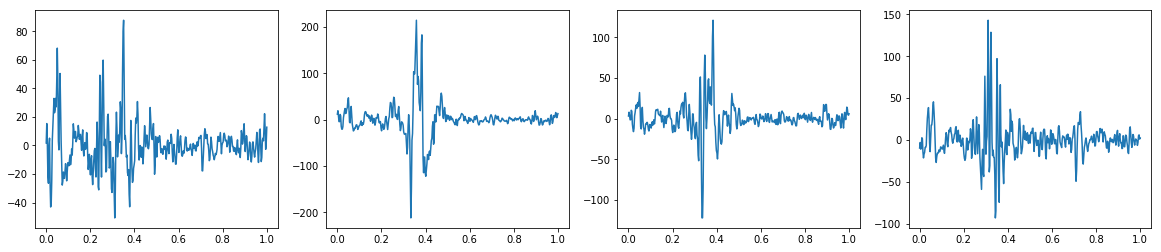

dataSet/turn-off/11.txt


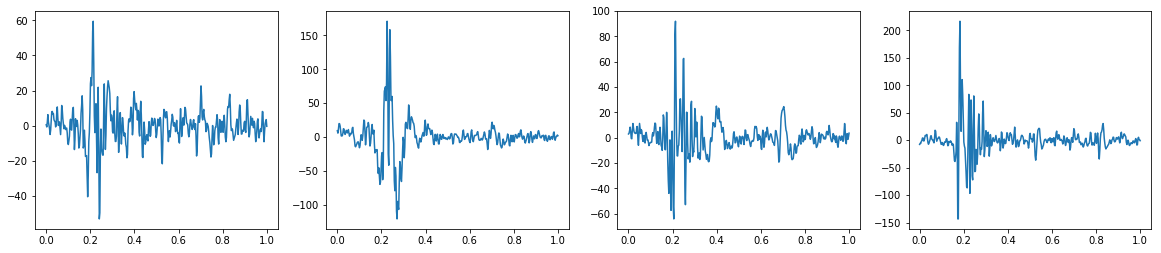

dataSet/turn-off/115.txt


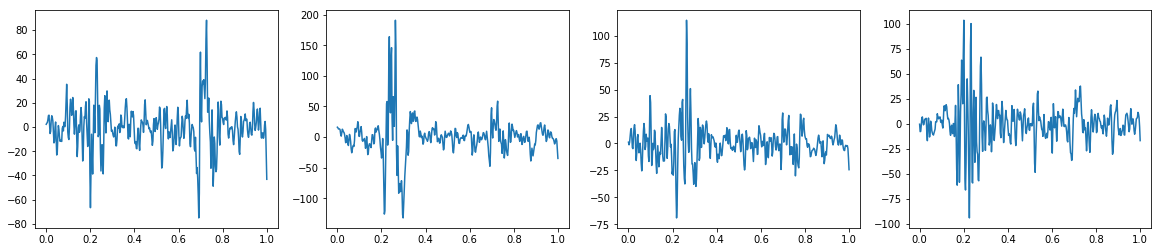

dataSet/turn-off/135.txt


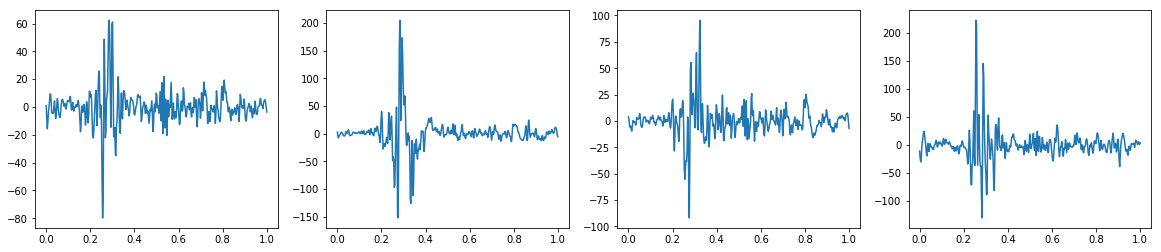

dataSet/turn-off/77.txt


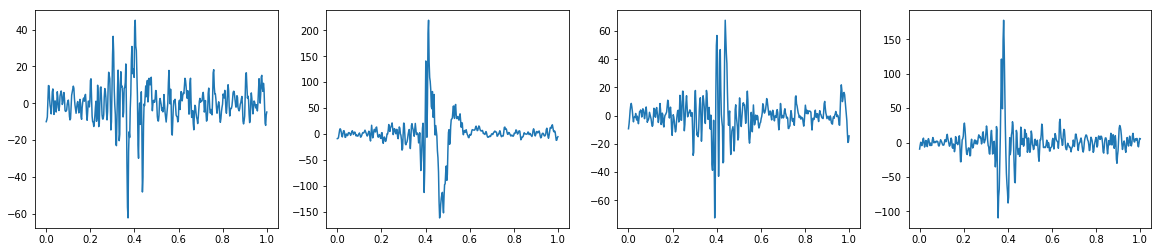

dataSet/turn-off/345.txt


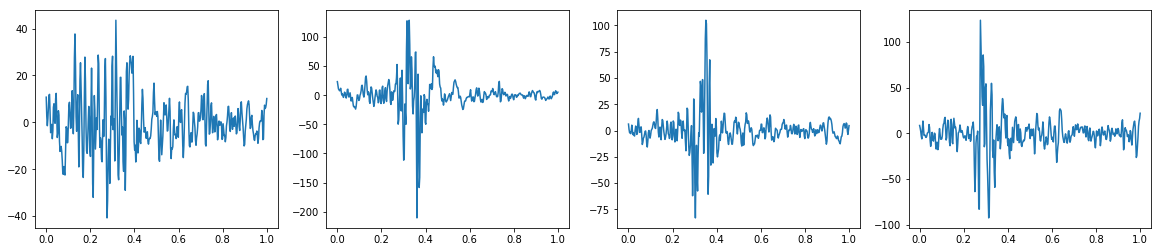

dataSet/turn-off/226.txt


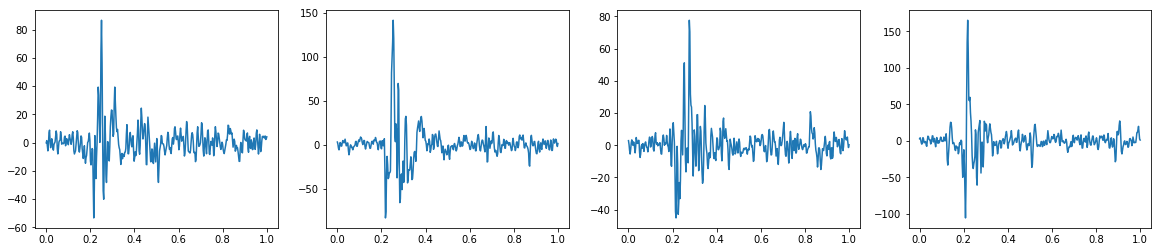

dataSet/turn-off/411.txt


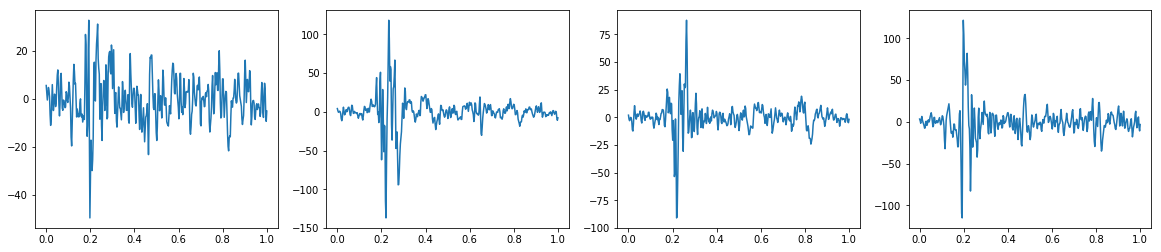

dataSet/turn-off/223.txt


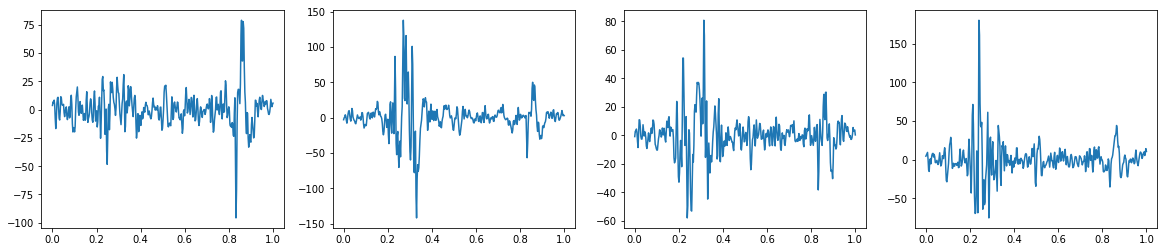

dataSet/turn-off/327.txt


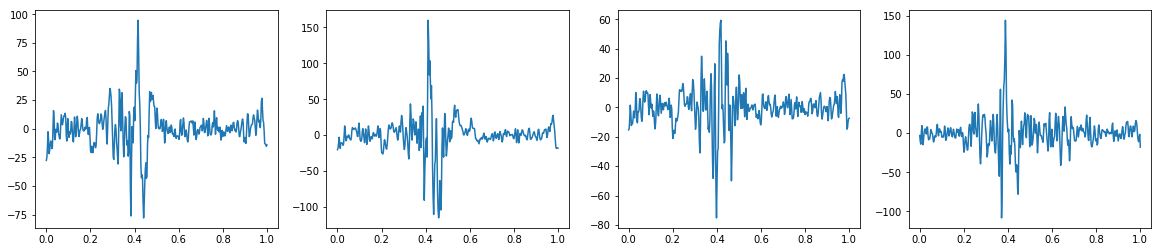

dataSet/turn-off/437.txt


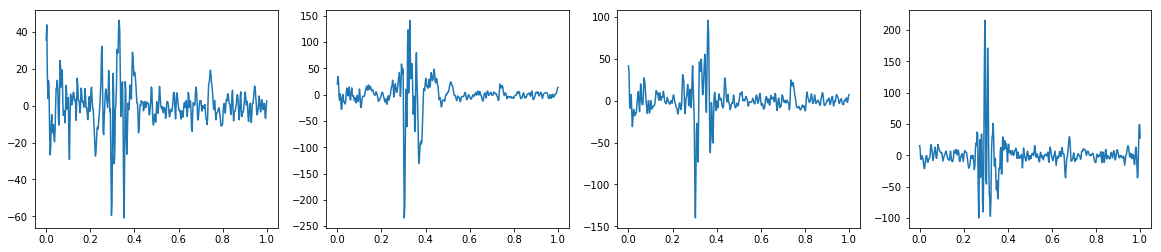

dataSet/turn-off/475.txt


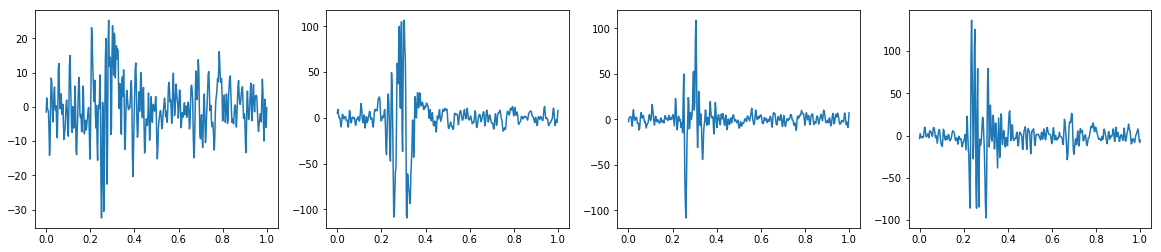

dataSet/turn-off/104.txt


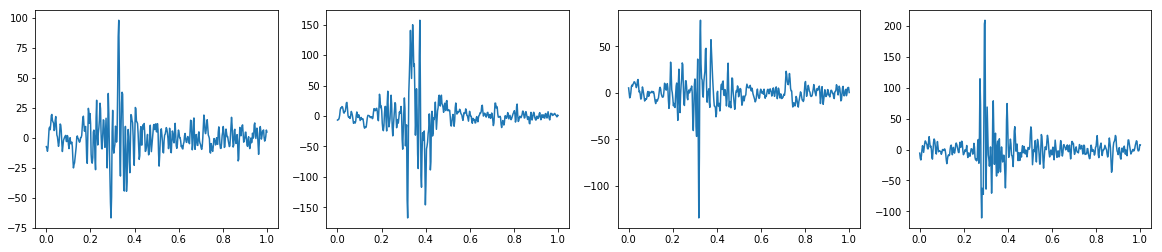

dataSet/turn-off/463.txt


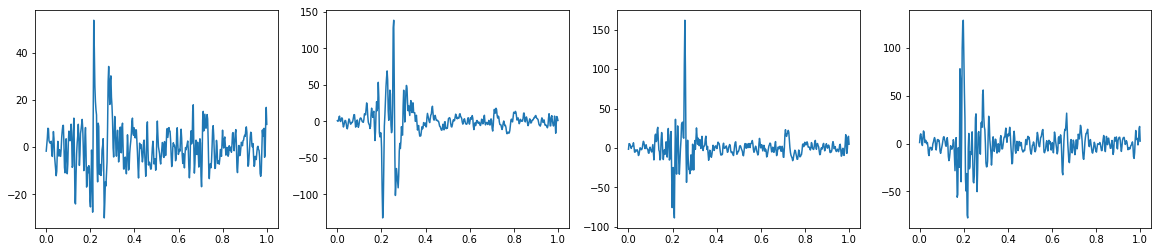

dataSet/turn-off/127.txt


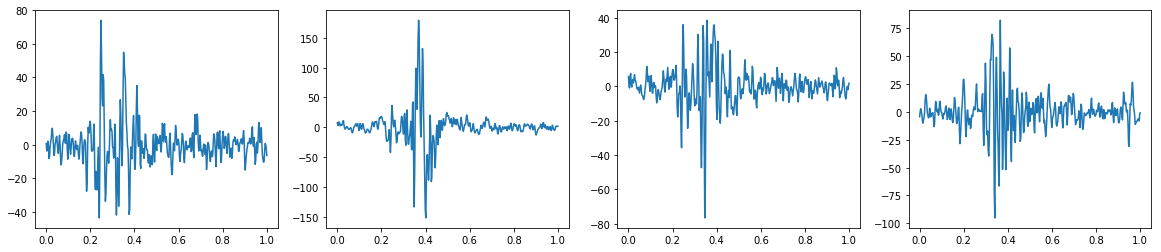

dataSet/turn-off/263.txt


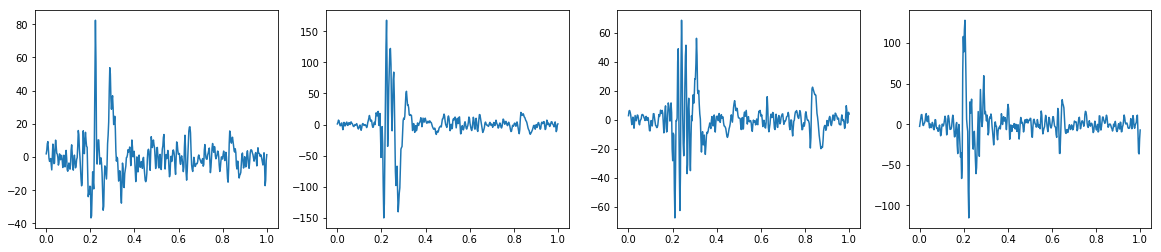

dataSet/turn-off/376.txt


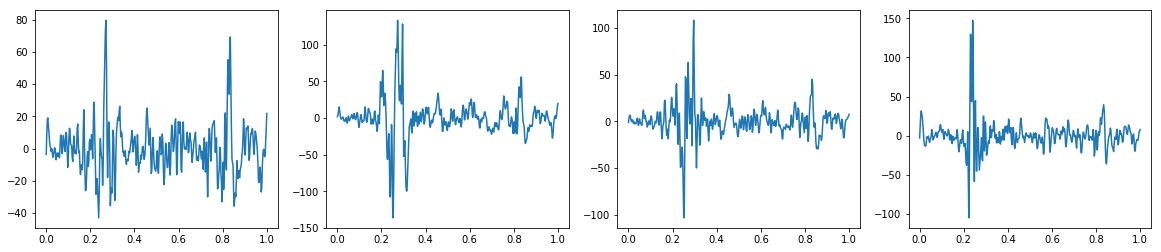

dataSet/turn-off/216.txt


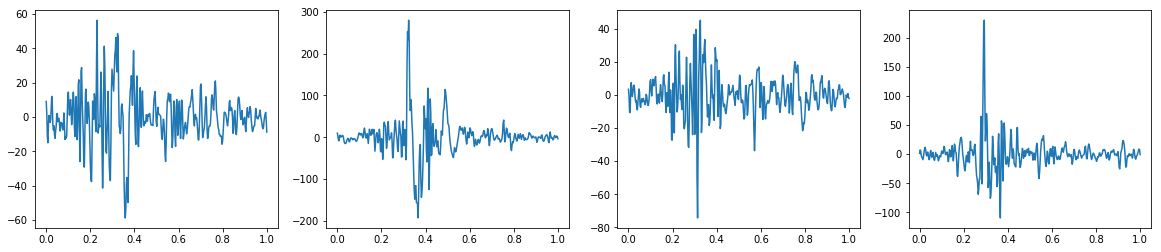

In [55]:
print_graph('./dataSet/turn-off/')

In [ ]:
path = './dataSet'
files = [(str(file), file.parts[-2]) for file in Path(path).glob("**/*.wav") if file

In [ ]:
def get_data(path):
    '''Get data from the path and create a pandas dataframe to store it,
    the function will return a pandas dataframe with fpath(file path) and label'''
    
    label_list = []
    fname = []

    # Get every audio files path and label
    files = [(str(file), file.parts[-2]) for file in Path(path).glob("**/*.wav") if file]
    file_len = len(files)
    print('Finish getting data')
    
    # Valid label name

            
        # Normal version training set, but only got 0.6 points in kaggle
#         label_list.append(label)
#         fname.append(file[0])

        # Try to only train valid-label data
        if label in valid_label:
            
            # For binary_crossentropy
#             label_list.append(label)

            # For sparse_categorical_crossentropy
            label_list.append(valid_label.index(label))
            fname.append(file[0])
            
        
    data = pd.DataFrame({'fpath': fname, 'label': label_list})
    
    print('Finish appending array')
    return data